# Build and interpret logistic regression models for binary classification Implementation of Logistic Regression using Python. 
## Objective: Build a logistic regression model to classify Iris flowers as Iris Virginica or not, using only sepal length and sepal width as features, and achieve the highest possible accuracy. 
For this example, we'll use the famous Iris dataset, which is a well-known 
dataset for classification tasks. 

# Step 1: Import Libraries 

In [32]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

* `sklearn.metrics.accuracy_score`: Calculates the accuracy of the 
model's predictions. 
* `sklearn.metrics.classification_report`: Generates a comprehensive report 
on the model's performance, including precision, recall, and F1 score. 

# Step 2: Load and Explore the Dataset

In [8]:
# Load the Iris dataset 
iris = load_iris() 

sklearn.utils._bunch.Bunch

In [10]:
data = pd.DataFrame(data= iris['data'], columns=  iris['feature_names'])

In [12]:
data['target'] = iris['target']

In [13]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Step 3: Prepare the Data 

In [16]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [25]:
# Selecting two features (sepal length and sepal width) for simplicity 
X = data[['sepal length (cm)', 'sepal width (cm)']] 
y = (data['target'] == 2).astype(int)  # Binary classification: Iris-Virginica or not 
print(X.shape, y.shape)

(150, 2) (150,)


## Split the data into training and testing sets 


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Step 4: Train the Logistic Regression Model

In [27]:
# Create a logistic regression model 
model = LogisticRegression() 
# Train the model on the training data 
model.fit(X_train, y_train) 

LogisticRegression()

# Step 5: Make Predictions

In [28]:
# Make predictions on the test data 
y_pred = model.predict(X_test) 

# Step 6: Evaluate the Model 

In [29]:
# Calculate accuracy 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Accuracy: {accuracy:.2f}') 
# Display classification report 
print('Classification Report:\n', classification_report(y_test, y_pred)) 

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.90      0.90      0.90        30



# Step 7: Visualizing the training set result 

C:\Users\vihas\.conda\envs\movie\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


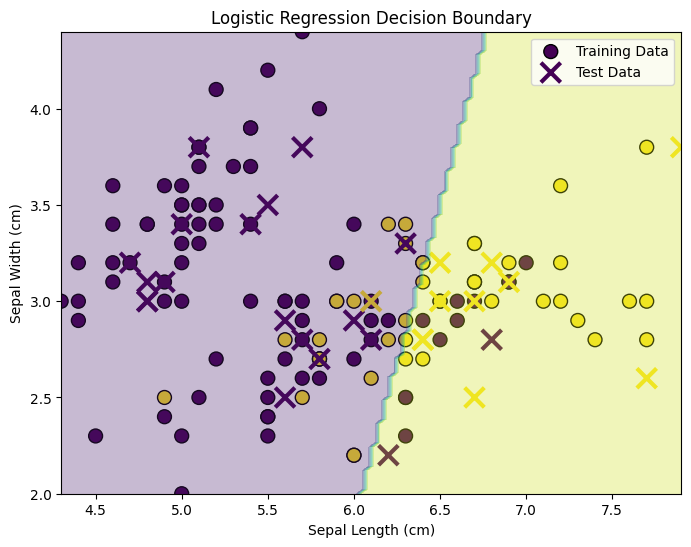

In [36]:
# Assuming you have feature names stored in separate variables
feature_names = ['sepal length (cm)', 'sepal width (cm)']

# Assign the feature names to X
X.columns = feature_names

# Rest of your code...

plt.figure(figsize=(8, 6)) # Visualize decision boundary 

# Plot the training points 
plt.scatter(X_train['sepal length (cm)'], 
            X_train['sepal width (cm)'], 
            c=y_train, cmap='viridis', 
            edgecolors='k', 
            s=100, 
            label='Training Data') 
 
# Plot the test points 
plt.scatter(X_test['sepal length (cm)'],
            X_test['sepal width (cm)'],
            c=y_test,
            cmap='viridis',
            marker='x', 
            s=200, 
            linewidth=3,
            label='Test Data') 
 
# Create a meshgrid for the decision boundary 
xx, yy = np.meshgrid(np.linspace(X['sepal length (cm)'].min(),X['sepal length (cm)'].max(), 100), 
                     np.linspace(X['sepal width (cm)'].min(), X['sepal width (cm)'].max(), 100)) 
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
 
# Plot decision boundary 
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis') 
 
plt.xlabel('Sepal Length (cm)') 
plt.ylabel('Sepal Width (cm)') 
plt.title('Logistic Regression Decision Boundary') 
 
plt.legend() # Add legend 
 
plt.show()